## Notebook  to demonstrate reading NSIDC sea ice concentration data (on EASE grid) and making a map plot

In [ ]:
#input file info
diri = '~/data/NSIDC/raw/SH/monthly/'                        #filepath
fili = 'seaice_conc_monthly_sh_197811_202112_v04r00.nc'      #netcdf filename
iNam = 'cdr_seaice_conc_monthly'      #variable name


#time selection
stdat = '2015-01'  ; endat = '2018-12'


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as crs
import cartopy as ccrs


read file

In [1]:
data = xr.open_dataset(diri+fili)
data

NameError: name 'xr' is not defined

get SIC for requred time period

In [2]:

#NSIDC usses a dummy time coord 'tdum', but to get the best out of xarray you want a time
#coord that's recognised as a datetime object, so I reassign the time coords


data = data.rename({'tdim' : 'time'}) #rename time dimension
data.assign_coords(time = data.time)  #replace 'tdim' with the time array


#get variable and select time period
sic = data[vNam].sel(time= slice(stdat,endat))
sic

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'melt_onset_day_seaice_conc_monthly_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


do some processing/calculation

In [ ]:
#for the case if this example, I'll calculate the monthly climatology 
#this also demonstrates the 'groupby' method in xarray, which is very useful

clim = sic.groupby('time.month').mean('time')

plot May climatology

Text(0.5, 1.0, 'SH EASE grid')

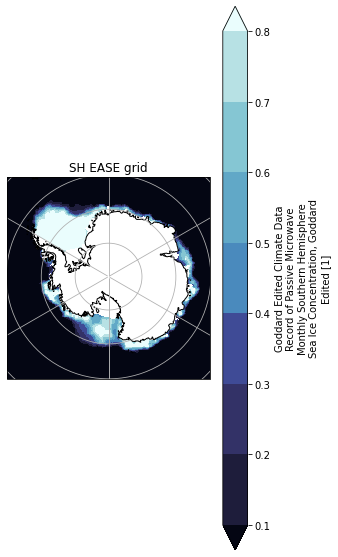

In [8]:


plt.figure(figsize=(10,10))    #size of figure
                                                       
clev = np.arange(0.1, 0.9, 0.1)  #contour levels
cmap = plt.cm.get_cmap('cmo.ice', 10) #Colormap


ax1 = plt.subplot(1,2,2,projection=crs.SouthPolarStereo())
ax1.set_extent([-180,180,-90,-60], crs.PlateCarree())
ax1.coastlines()     #add coastline
ax1.gridlines()      #add gridlines

 
sic[4,:,:].plot.pcolormesh(ax=ax1, x='xgrid', y='ygrid',transform=crs.Stereographic(**kw),cmap=cmap, levels = clev)
ax1.set_title('May SIC grid')

